You can get the data here: https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f

# Exploratory Data Analysis

**1. Getting the data** 

In [1]:
#load basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
ridership_df = pd.read_csv('/Users/jcunanan/Downloads/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv', parse_dates=['date'])

Next we look at how the data actually looks like.

In [3]:
ridership_df.head()

,station_id,stationname,date,daytype,rides
0,40850,Library,2004-10-09,A,1057
1,40780,Central Park,2010-06-18,W,1154
2,41500,Montrose-Brown,2001-10-30,W,2116
3,40500,Washington/State,2006-10-26,W,0
4,41090,Monroe/State,2010-07-07,W,9431


In [4]:
ridership_df.tail()

,station_id,stationname,date,daytype,rides
962541,41700,Washington/Wabash,2019-06-26,W,11630
962542,41700,Washington/Wabash,2019-06-27,W,11558
962543,41700,Washington/Wabash,2019-06-28,W,11002
962544,41700,Washington/Wabash,2019-06-29,A,5992
962545,41700,Washington/Wabash,2019-06-30,U,5632


In [5]:
time_series = pd.read_csv('/Users/jcunanan/Downloads/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv', index_col='date', parse_dates=True)
time_series[:5]

,station_id,stationname,daytype,rides
date,,,,
2004-10-09,40850,Library,A,1057
2010-06-18,40780,Central Park,W,1154
2001-10-30,41500,Montrose-Brown,W,2116
2006-10-26,40500,Washington/State,W,0
2010-07-07,41090,Monroe/State,W,9431


In [6]:
time_series = time_series.sort_index()
time_series[:15]

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41030,Polk,U,0
2001-01-01,40260,State/Lake,U,2059
2001-01-01,40840,South Boulevard,U,202
2001-01-01,40720,East 63rd-Cottage Grove,U,391
2001-01-01,40250,Kedzie-Homan-Forest Park,U,448
2001-01-01,41070,Kedzie-Lake,U,357
2001-01-01,40310,Western-Orange,U,460
2001-01-01,40090,Damen-Brown,U,411
2001-01-01,41130,Halsted-Orange,U,306


We will explore more information using our time_series dataframe later. 

For now, let's answer some basic statistical questions. 
First we look at which 'daytype' has the most number of rides in average.

In [7]:
ridership_df.groupby('daytype')['rides'].mean().sort_values(ascending=False)

daytype
W    3911.048711
A    2274.900786
U    1649.805114
Name: rides, dtype: float64

As expected, weekdays! This does not tell us much. Next, let us look at which station has the most number of rides
in average.

In [8]:
ave_per_station = ridership_df.groupby('stationname')['rides'].mean().sort_values(ascending=False)
ave_per_station[:5]

stationname
Clark/Lake            14031.971433
Lake/State            13950.696759
Chicago/State         12930.593634
95th/Dan Ryan         10517.269391
Belmont-North Main    10462.787861
Name: rides, dtype: float64

Let's visualize the top 10 highest ridership per_station

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

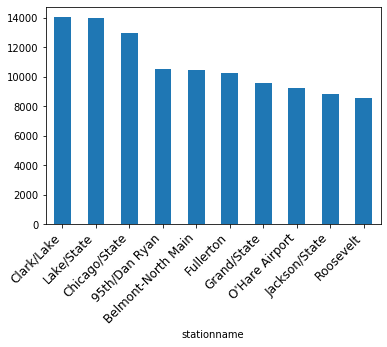

In [9]:
ave_per_station[:10].plot(kind='bar')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

We follow-up our knowledge of the mean by checking the standard deviations!

In [10]:
std_per_station = ridership_df.groupby('stationname')['rides'].std().sort_values(ascending=False)
std_per_station[:10]

stationname
Clark/Lake             6789.412162
Lake/State             5790.918345
Washington/State       3814.963167
Jackson/State          3809.053744
Addison-North Main     3684.223485
95th/Dan Ryan          3583.416701
Washington/Dearborn    3565.589916
Fullerton              3432.159897
Washington/Wabash      3311.520700
Monroe/State           3243.990080
Name: rides, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

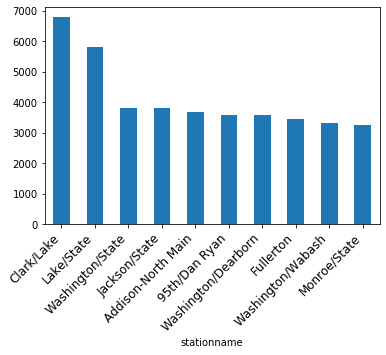

In [11]:
std_per_station[:10].plot(kind='bar')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

Since I am not familiar with station names, I want to confirm whether there is a one to one correspondence betweem stationname and station_id

In [12]:
ridership_df['stationname'].nunique(), ridership_df['station_id'].nunique()

(148, 147)

So, there is one odd station name...It might be that 2 unique station names has similar station_id.
Let's see which one it is.

In [13]:
daytype_df = pd.pivot_table(ridership_df, values=['rides'], index=['station_id', 'stationname'],
...                     columns=['daytype'], aggfunc=np.mean)
daytype_df[:20]

rides                          
daytype                                    A            U            W
station_id stationname                                                
40010      Austin-Forest Park     887.690947   641.231628  1870.844134
40020      Harlem-Lake           2191.815817  1443.944186  3654.180682
40030      Pulaski-Lake          1080.664590   789.225836  1631.513233
40040      Quincy/Wells          1517.070539  1227.069638  7501.144762
40050      Davis                 2815.259105  1798.489302  3741.869703
40060      Belmont-O'Hare        2771.721124  2074.629630  4885.281693
40070      Jackson/Dearborn      2962.892004  2228.706320  7475.797246
40080      Sheridan              3553.414761  2566.196279  5001.323729
40090      Damen-Brown           1259.247401   800.171933  2189.556732
40100      Morse                 3195.191710  2440.701950  4293.905397
40120      35th/Archer           1313.436590   884.659535  2768.054014
40130      51st                   730.500520   486.680297  1093.598602
40140      Dempster-Skokie       1088.190476   812.220379  1959.605306
           Skokie                 444.142123   330.325688  2489.744518
40150      Pulaski-Cermak         533.744017   397.469767   918.726907
40160      LaSalle/Van Buren      461.664932   323.797398  3036.004446
40170      Ashland-Lake          1190.120708   798.731413  2185.620631
40180      Oak Park-Forest Park   655.419087   454.529685  1685.502222
40190      Sox-35th-Dan Ryan     3386.378265  2590.343312  4371.490743
40200      Randolph/Wabash       3281.696809  2105.785375  6597.678153

So Dempster-Skokie and Skokie has the same station_id. We hit two birds in one stone since we also looked at the average ridership for each stationname per daytype.

Now let's visualize. Below is a plot showing the top 20 highest average ridership on a Weekday.

Text(0.5, 1.0, 'top 20 highest average ridership on a Weekday')

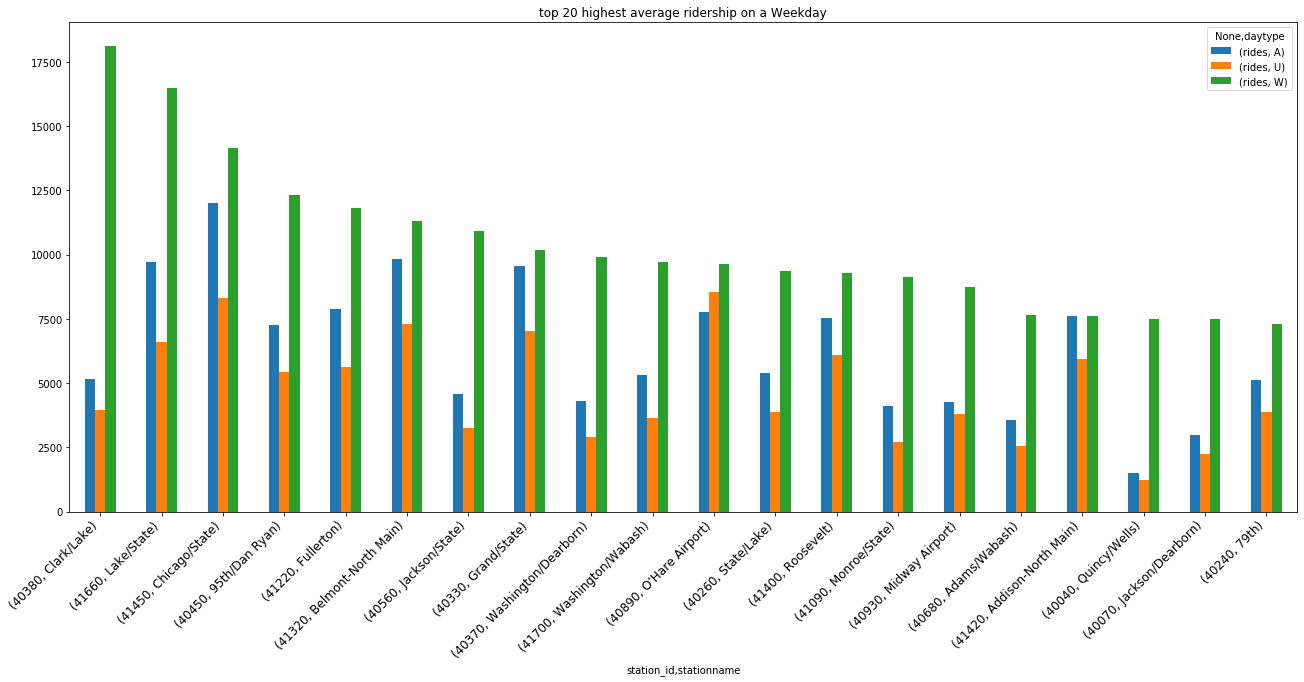

In [14]:
daytype_df.sort_values(by=('rides','W'), ascending=False)[:20].plot(kind='bar', figsize=(22, 9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('top 20 highest average ridership on a Weekday')

Below is a plot showing the top 20 highest average ridership on a Saturday.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

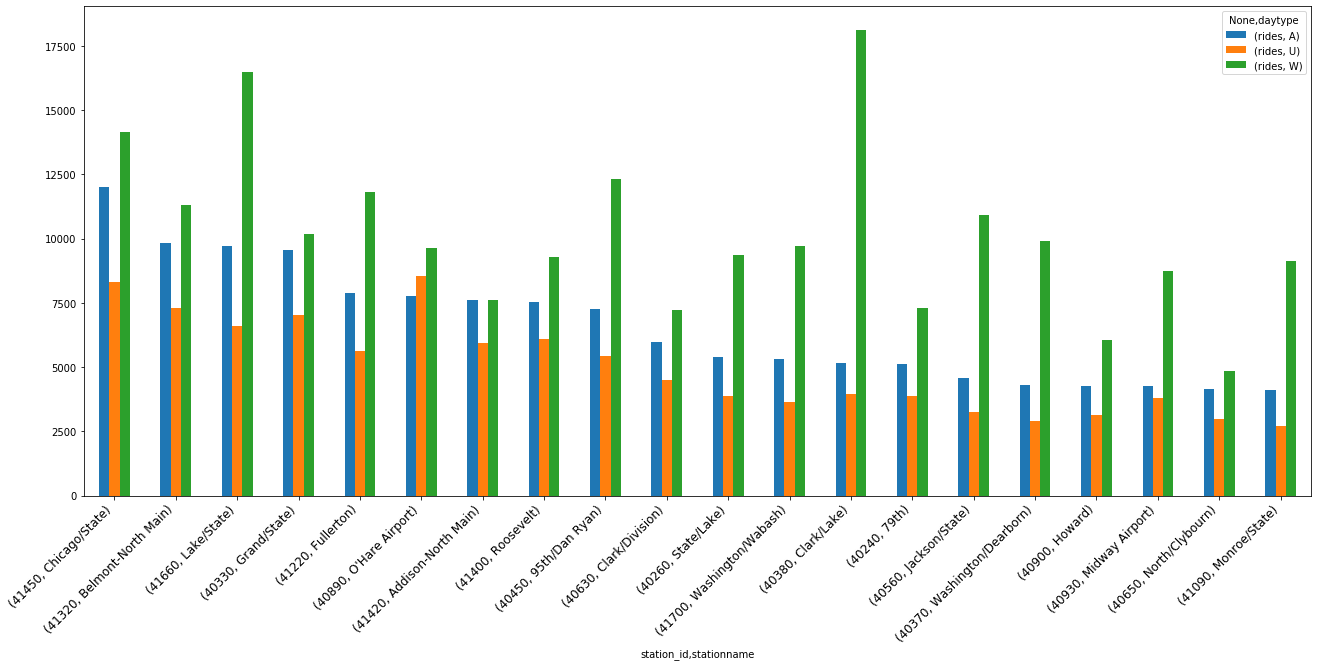

In [15]:
daytype_df.sort_values(by=('rides','A'), ascending=False)[:20].plot(kind='bar', figsize=(22, 9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

Below is a plot showing the top 20 highest average ridership on a Sunday/Holiday.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

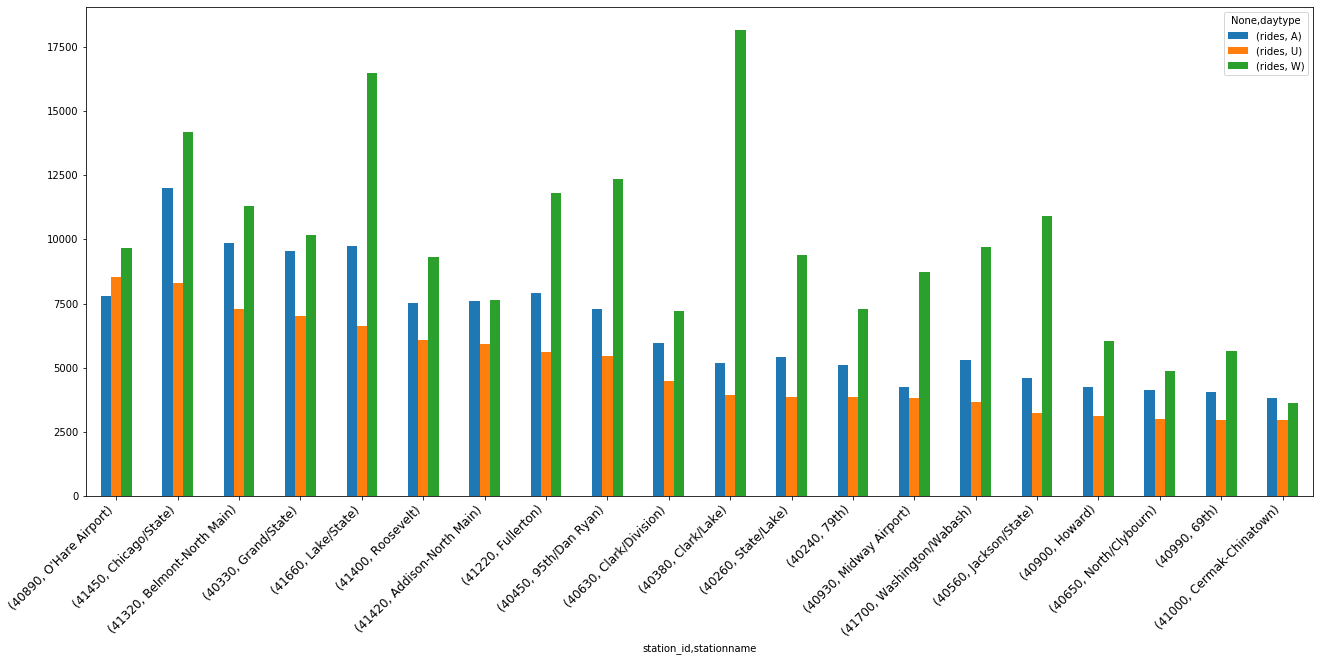

In [16]:
daytype_df.sort_values(by=('rides','U'), ascending=False)[:20].plot(kind='bar', figsize=(22, 9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

**Some observations**

1. Clark/Lake and Lake/State are the two highest ridership on weekdays and overall days.
2. Lake/State rank 3rd while Clark/Lake ranked 13th for average ridership on Saturdays, Chicago/State tops this area.
3. Lake/State rank 5th while Clark/Lake ranked 11th for average ridership on Sundays/holidays, Chicago/State tops this area.

Seems like more people in Clark/Lake and tends to visit other places on the weekends. This is supported by the standard deviations we calculated earlier!

Next we look at the range of dates this data is taken.

In [17]:
bydate = pd.pivot_table(ridership_df, index='date', columns='stationname', values='rides', aggfunc=np.sum)
bydate.head()

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,Washington/State,Washington/Wabash,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.0,448.0,318.0,211.0,787.0,427.0,364.0,0.0,1366.0,2366.0,...,1181.0,NaN,259.0,270.0,715.0,0.0,318.0,460.0,621.0,1449.0
2001-01-02,813.0,1195.0,1654.0,640.0,1902.0,1116.0,913.0,1404.0,3047.0,5732.0,...,6507.0,NaN,6788.0,2194.0,3194.0,418.0,702.0,2627.0,2504.0,3519.0
2001-01-03,881.0,1357.0,1777.0,713.0,1965.0,1216.0,1071.0,1466.0,3350.0,5977.0,...,6783.0,NaN,7321.0,2449.0,3272.0,457.0,812.0,2846.0,2601.0,4211.0
2001-01-04,884.0,1389.0,1878.0,695.0,2130.0,1165.0,994.0,1530.0,3371.0,6206.0,...,6906.0,NaN,7350.0,2548.0,3398.0,478.0,774.0,3086.0,2837.0,4132.0
2001-01-05,925.0,1478.0,1825.0,724.0,2182.0,1349.0,1068.0,1554.0,3456.0,6436.0,...,6802.0,NaN,6983.0,2466.0,3346.0,505.0,860.0,3073.0,2740.0,4144.0


**Our data is from 2011-01-01 to 2019-06-30**

This is enough for us to see some trends depending on seasons. Let us see some basic statistical info and plots.

In [18]:
bydate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6755 entries, 2001-01-01 to 2019-06-30
Columns: 148 entries, 18th to Wilson
dtypes: float64(148)
memory usage: 7.7 MB


In [19]:
bydate.describe()

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,Washington/State,Washington/Wabash,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
count,6755.000000,6755.000000,6755.000000,6755.000000,6725.000000,6755.000000,6755.000000,6755.000000,6725.000000,6725.000000,...,2953.000000,699.00000,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000
mean,1273.577646,1817.496521,2262.400888,835.118579,2618.292788,1104.834345,945.752480,1562.343153,2895.221264,5006.532491,...,4849.686421,8112.83691,5380.630052,2118.818061,3233.877424,795.218949,1227.520355,2908.019689,3707.557513,4961.180903
std,562.490448,843.376136,886.516163,300.191859,759.554333,358.042967,292.721843,671.163698,792.090371,1417.109333,...,3814.963167,3311.52070,3012.827110,1109.366141,972.512651,358.756400,439.304903,1118.252194,1528.724362,1521.996690
min,0.000000,138.000000,196.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,387.000000,0.000000,3.000000,280.000000,24.000000,966.000000
25%,952.000000,1253.500000,1465.000000,575.000000,2090.000000,855.500000,715.000000,1131.000000,2339.000000,4121.000000,...,1.000000,5398.50000,1330.000000,1083.500000,2620.500000,549.000000,903.000000,1820.500000,2500.000000,3798.500000
50%,1246.000000,1842.000000,2492.000000,897.000000,2835.000000,1169.000000,1026.000000,1740.000000,3069.000000,5376.000000,...,5947.000000,9704.00000,6845.000000,2464.000000,3399.000000,802.000000,1141.000000,3298.000000,3828.000000,5197.000000
75%,1748.000000,2208.000000,2960.000000,1048.000000,3171.000000,1331.000000,1137.000000,2076.000000,3462.000000,6046.000000,...,7980.000000,10505.00000,7591.500000,2989.000000,4018.500000,1107.000000,1613.000000,3668.500000,4931.000000,6026.000000
max,3594.000000,8532.000000,5632.000000,2259.000000,7387.000000,2795.000000,3013.000000,4437.000000,9554.000000,11171.000000,...,12442.000000,14786.00000,11087.000000,10482.000000,7908.000000,2270.000000,3232.000000,6999.000000,16357.000000,11575.000000


We now answer the warm-up questions using the bydate DataFrame

In [20]:
bydate['Clark/Lake'].mean() # Why is this different from above!?

14034.048704663212

In [21]:
ridership_df.loc[ridership_df['stationname']=='Clark/Lake']['date'].value_counts()[:5]

2011-07-03    2
2005-05-29    1
2007-08-17    1
2008-03-29    1
2003-01-01    1
Name: date, dtype: int64

**OK, so the data 2011-07-03 is the culprit for having different mean for Clark/Lake!**

In [22]:
bydate['Clark/Lake']['2011-07-03']

11147.0

In [23]:
ridership_df.loc[ridership_df['stationname']=='Clark/Lake' ].loc[ridership_df['date'] == '2011-07-03']

,station_id,stationname,date,daytype,rides
216343,40380,Clark/Lake,2011-07-03,U,5574
486916,40380,Clark/Lake,2011-07-03,U,5573


In [24]:
bydate['Washington/Wabash'].std() # same as above

3311.5206998985127

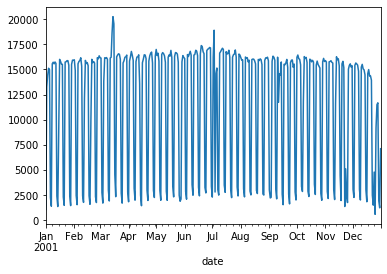

In [25]:
bydate['Clark/Lake'][:365].plot()

OK, we don't really get much from the plot above... We will do a resampling by year, months, weeks, to see better.

Below are the top 5 highest ridership on average.

In [26]:
top_5 = ave_per_station[:5].index.tolist()
top_5

['Clark/Lake',
 'Lake/State',
 'Chicago/State',
 '95th/Dan Ryan',
 'Belmont-North Main']

Now we look at the trend of these top 5 stations from 2011 to the end of June 2019.

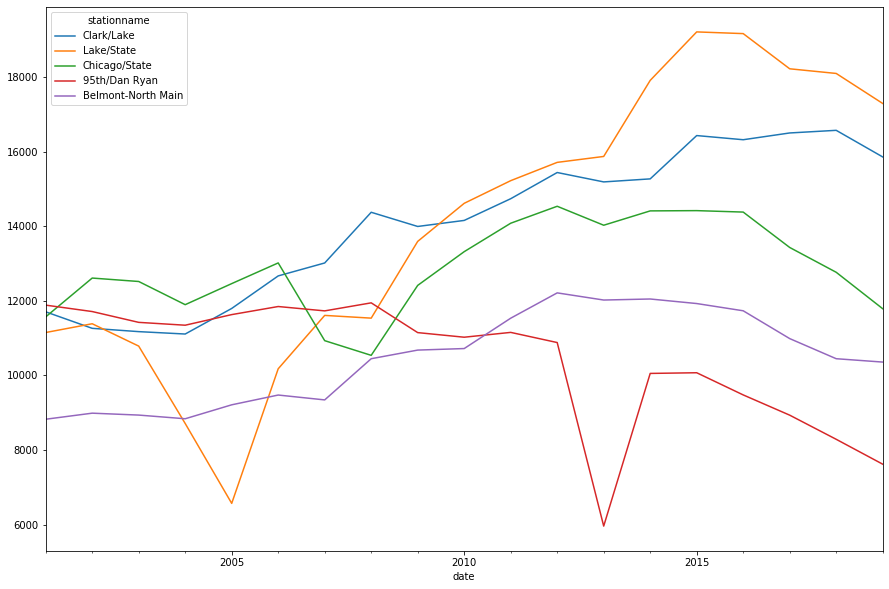

In [27]:
bydate[top_5].resample('Y').mean().plot(figsize=(15,10))

Looks like 95th/Dan Ryan has a decreasing trend for ridership.

Below let's look at the trend for ridership by month on year 2018.

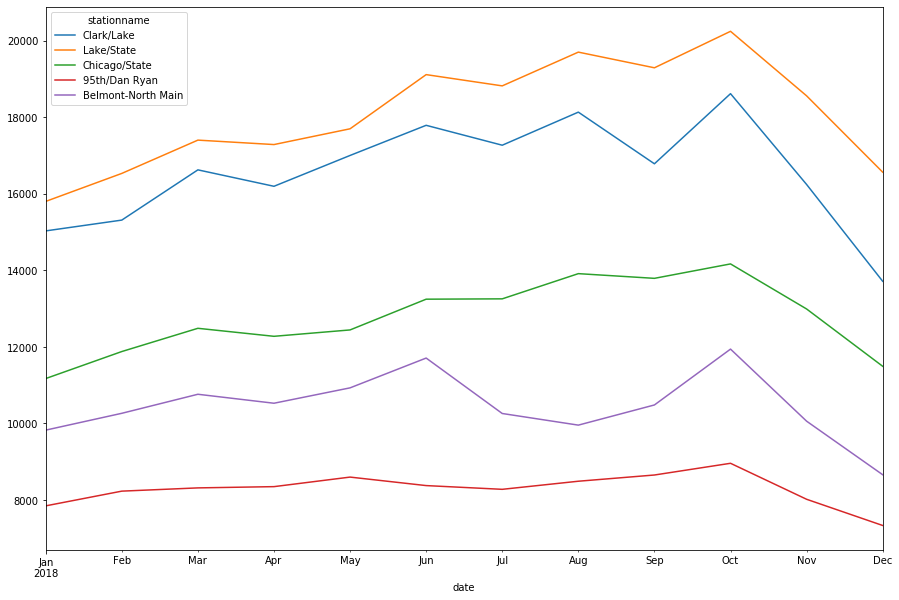

In [28]:
bydate[top_5]['2018'].resample('M').mean().plot(figsize=(15,10))

One obvious observation is the decreasing trend for all stations from October to December.

**Let us now look the overall trend of ridership for all 'L' station entries from 2011 to 2019**

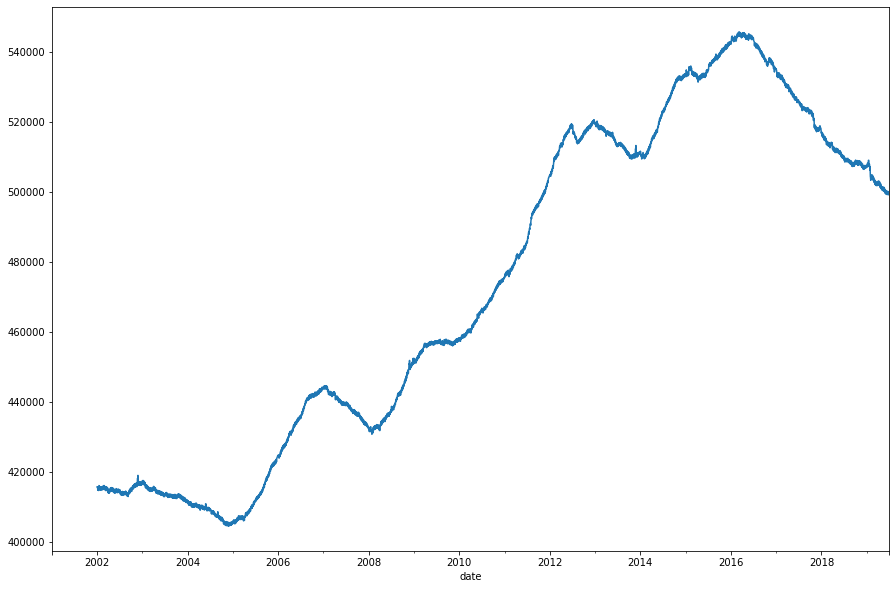

In [29]:
bydate.sum(axis=1).rolling(window=365).mean().plot(kind='line', figsize=(15,10))

**Observation: We see that from 2016 there is a decreasing trend for ridership**

**Next I want to focus on the station Chicago/State since it has consistently high ridership on average. This might mean consistent flow of customers for a business which operates all year round.**

In [30]:
chicago_state = bydate['Chicago/State'] #ridership_df.loc[ridership_df['stationname']=='Chicago/State']
chicago_state[:5]

date
2001-01-01     4395.0
2001-01-02    11058.0
2001-01-03    11680.0
2001-01-04    11883.0
2001-01-05    12771.0
Name: Chicago/State, dtype: float64

**Next we will use a simple model to predict ridership from July 2019 to December 2019**

**The first model are daily predictions of ridership**

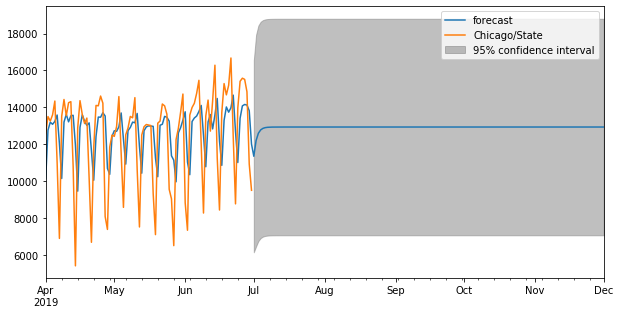

In [31]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast using an AR(1) model
mod = ARMA(chicago_state, order=(1,0), freq='D')
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax  = plt.subplots(figsize=(10,5))
fig = res.plot_predict(start='2019-04', end='2019-12', ax=ax)
plt.show()

**The second model are weekly predictions of ridership**

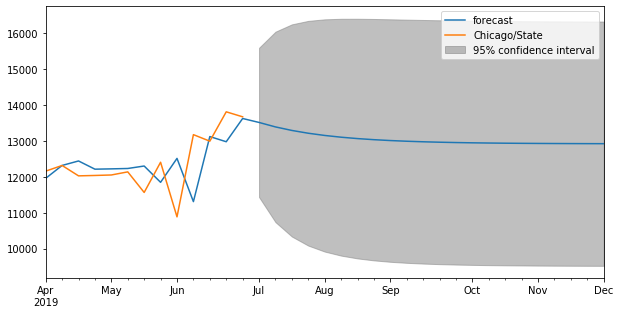

In [32]:
chicago_weekly = chicago_state.resample('W').mean()

# Forecast using an AR(1) model
mod = ARMA(chicago_weekly, order=(1,0), freq='W')
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax  = plt.subplots(figsize=(10,5))
fig = res.plot_predict(start='2019-04', end='2019-12', ax=ax)
plt.show()

**The third model gives a yearly prediction of ridership**

**As we have seen earlier, this prediction agrees with the decreasing trend for overall ridership on all L'station stops, although we can see that from 2020 it is predicted to have a slowly increasing trend**

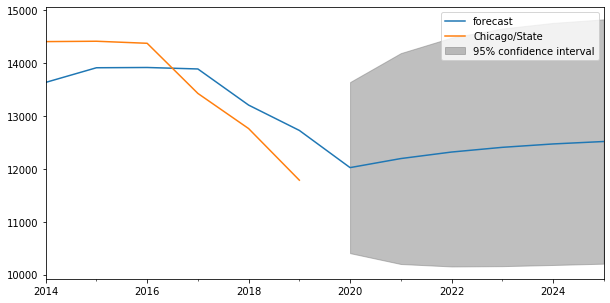

In [33]:
chicago_yearly = chicago_state.resample('Y').mean()

# Forecast interest rates using an AR(1) model
mod = ARMA(chicago_yearly, order=(1,0), freq='Y')
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax  = plt.subplots(figsize=(10,5))
fig = res.plot_predict(start='2014', end='2025', ax=ax)
plt.show()